In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [221]:
data = pd.read_excel('Pizza.xlsx')

In [222]:
data.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [223]:
df = data[['pizza_id', 'quantity', 'order_date', 'unit_price']]

In [224]:
df.head()

,pizza_id,quantity,order_date,unit_price
0,hawaiian_m,1,2015-01-01,13.25
1,classic_dlx_m,1,2015-01-01,16.00
2,five_cheese_l,1,2015-01-01,18.50
3,ital_supr_l,1,2015-01-01,20.75
4,mexicana_m,1,2015-01-01,16.00


In [225]:
df_by_day = df.groupby(['pizza_id', 'order_date']).agg({'quantity': 'sum', 'unit_price': 'first'}).reset_index()


In [226]:
df_by_week = df.groupby(['pizza_id', df['order_date'].dt.isocalendar().week]).agg({'quantity': 'sum', 'unit_price': 'first'}).reset_index()


In [227]:
print(
    'number of rows of the original dataset',
    df.iloc[:,0].count(),
    'number of rows after grouping by day',
    df_by_day.iloc[:,0].count(),
    'number of rows after grouping by week',
    df_by_week.iloc[:,0].count(), sep = '\n'
)


number of rows of the original dataset
48620
number of rows after grouping by day
22964
number of rows after grouping by week
4753


In [228]:
df_by_week.head()

,pizza_id,week,quantity,unit_price
0,bbq_ckn_l,1,18,20.75
1,bbq_ckn_l,2,13,20.75
2,bbq_ckn_l,3,25,20.75
3,bbq_ckn_l,4,15,20.75
4,bbq_ckn_l,5,29,20.75


In [229]:
df_by_day.head(10)

,pizza_id,order_date,quantity,unit_price
0,bbq_ckn_l,2015-01-01,6,20.75
1,bbq_ckn_l,2015-01-02,3,20.75
2,bbq_ckn_l,2015-01-03,3,20.75
3,bbq_ckn_l,2015-01-04,6,20.75
4,bbq_ckn_l,2015-01-05,1,20.75
5,bbq_ckn_l,2015-01-06,2,20.75
6,bbq_ckn_l,2015-01-07,2,20.75
7,bbq_ckn_l,2015-01-08,3,20.75
8,bbq_ckn_l,2015-01-09,1,20.75
9,bbq_ckn_l,2015-01-10,3,20.75


In [230]:
from sklearn.utils import shuffle
df_by_day = shuffle(df_by_day)
df_by_day.reset_index(drop = True, inplace = True)

In [231]:
df_by_day.head(10)

,pizza_id,order_date,quantity,unit_price
0,four_cheese_m,2015-09-19,2,14.75
1,spin_pesto_m,2015-05-10,2,16.50
2,peppr_salami_l,2015-12-26,1,20.75
3,cali_ckn_l,2015-09-20,1,20.75
4,calabrese_s,2015-06-02,1,12.25
5,ital_supr_s,2015-08-01,1,12.50
6,spinach_fet_s,2015-02-15,2,12.00
7,sicilian_l,2015-03-06,1,20.25
8,the_greek_s,2015-03-30,1,12.00
9,southw_ckn_m,2015-08-19,2,16.75


Bulding a Model for the Data Grouped by Day and Pizza ID

In [232]:
x = df_by_day[['pizza_id', 'order_date']]
y = df_by_day.quantity

In [233]:
x_encoded = pd.get_dummies(x)

In [234]:
x_encoded.order_date = x_encoded.order_date.astype('int64') // 10**9

In [235]:
x_train_day, x_test_day, y_train_day, y_test_day = train_test_split(x_encoded, y, test_size = 0.2, random_state = 42)

In [236]:
model_by_day = LinearRegression()
model_by_day.fit(x_train_day, y_train_day)

LinearRegression()

In [237]:
y_pred_day = model_by_day.predict(x_test_day)

In [238]:
mse_day = mean_squared_error(y_test_day, y_pred_day)
print('Mean Squared Error:', mse_day)

Mean Squared Error: 1.4702379254484155


Bulding a Model for the Data Grouped by Week and Pizza ID

In [239]:
df_by_week = shuffle(df_by_week)
df_by_week.reset_index(drop = True, inplace = True)

In [240]:
x = df_by_week[['pizza_id', 'week']]
y = df_by_week.quantity

In [241]:
df_by_week.head()

,pizza_id,week,quantity,unit_price
0,veggie_veg_m,51,16,16.00
1,peppr_salami_m,50,7,16.50
2,veggie_veg_s,5,9,12.00
3,ckn_alfredo_m,36,16,16.75
4,spin_pesto_m,31,4,16.50


In [242]:
x_encoded = pd.get_dummies(x)

In [243]:
x_train_week, x_test_week, y_train_week, y_test_week = train_test_split(x_encoded, y, test_size = 0.2, random_state = 42)

In [244]:
model_by_week = LinearRegression()
model_by_week.fit(x_train_week, y_train_week)

LinearRegression()

In [245]:
y_pred_week = model_by_week.predict(x_test_week)
mse_week = mean_squared_error(y_test_week, y_pred_week)
print('Mean Squared Error:', mse_week)

Mean Squared Error: 12.516452113306913


Building a Model for the Original Data

In [246]:
df.head()

,pizza_id,quantity,order_date,unit_price
0,hawaiian_m,1,2015-01-01,13.25
1,classic_dlx_m,1,2015-01-01,16.00
2,five_cheese_l,1,2015-01-01,18.50
3,ital_supr_l,1,2015-01-01,20.75
4,mexicana_m,1,2015-01-01,16.00


In [247]:
df = shuffle(df, random_state = 42)
df.reset_index(drop = True, inplace = True)
df.head()

,pizza_id,quantity,order_date,unit_price
0,pepperoni_m,1,2015-11-15,12.50
1,hawaiian_m,1,2015-10-18,13.25
2,calabrese_m,1,2015-04-04,16.25
3,hawaiian_l,1,2015-08-20,16.50
4,veggie_veg_m,1,2015-06-22,16.00


In [248]:
x = df[['pizza_id', 'order_date']]
y = df.quantity

In [249]:
x_encoded = pd.get_dummies(x)

In [250]:
x_encoded.order_date = x_encoded.order_date.astype('int64') // 10**9

In [251]:
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(x_encoded, y, test_size = 0.2, random_state = 42)

In [252]:
model_original = LinearRegression()
model_original.fit(x_train_original, y_train_original)

LinearRegression()

In [253]:
y_pred_original = model_original.predict(x_test_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
print('Mean Squared Error:', mse_original)

Mean Squared Error: 0.021630427415604024


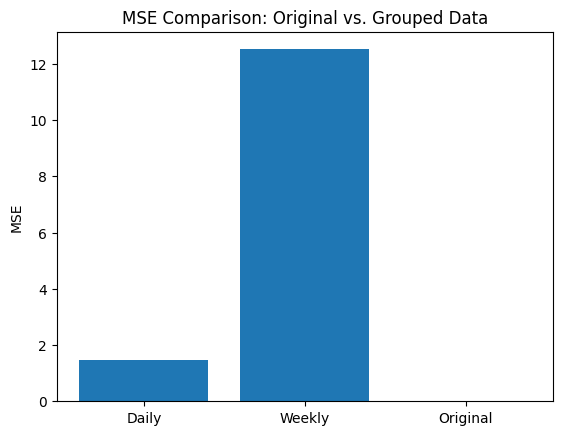

In [254]:
mse_group = [mse_day, mse_week, mse_original]
mse_labels = ['Daily', 'Weekly', 'Original']

plt.bar(mse_labels, mse_group)
plt.ylabel('MSE')
plt.title('MSE Comparison: Original vs. Grouped Data')
plt.show()

In [ ]:
'''
model names:
model_by_day <-- this is recommended
model_by_week
model_original
'''